# Challenge

## Download and install Spark

In [1]:
!ls

sample_data


In [2]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [30.4 kB]
Get:13

## Setup environment

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

## Downloading and preprocessing Chicago's Reported Crime Data

In [0]:
#!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
#!ls -l

In [0]:
#!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
#!ls -l

In [6]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('drive/My Drive/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.cache()
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

## Challenge questions

**What is the most frequently reported non-criminal activity?**

In [8]:
rc.groupBy("Domestic").count().show()

+--------+-------+
|Domestic|  count|
+--------+-------+
|   false|5866036|
|    true| 885919|
+--------+-------+



In [10]:
rc.select("Primary Type").distinct().orderBy("Primary Type").show(50,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN       |
|OTHER NARCOTIC VIOLATION   

In [0]:
nc= rc.filter((col("Primary Type")=="NON - CRIMINAL")|(col("Primary Type")=="NON-CRIMINAL (SUBJECT SPECIFIED)")|(col("Primary Type")=="NON-CRIMINAL"))

In [12]:
nc.count()

211

In [15]:
nc.groupBy("Description").count().orderBy("count", ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime. 
**

In [0]:
from pyspark.sql.functions import dayofweek

In [0]:
from pyspark.sql.functions import date_format

In [17]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [31]:
rc.withColumn("day",date_format( col('Date'),'E')).groupBy("day").count().show()

+---+-------+
|day|  count|
+---+-------+
|Sun| 911769|
|Mon| 952530|
|Thu| 964359|
|Sat| 965003|
|Wed| 973680|
|Tue| 967845|
|Fri|1016769|
+---+-------+



In [0]:
crimes_per_day=rc.withColumn("day",date_format(col('Date'),'E')).groupBy("day").count().orderBy("count",ascending=False)

In [35]:
crimes_per_day.show()

+---+-------+
|day|  count|
+---+-------+
|Fri|1016769|
|Wed| 973680|
|Tue| 967845|
|Sat| 965003|
|Thu| 964359|
|Mon| 952530|
|Sun| 911769|
+---+-------+



In [39]:
days= [day[0] for day in crimes_per_day.select('day').collect()]
days

['Fri', 'Wed', 'Tue', 'Sat', 'Thu', 'Mon', 'Sun']

In [40]:
cnts= [cnt[0] for cnt in crimes_per_day.select('count').collect()]
cnts

[1016769, 973680, 967845, 965003, 964359, 952530, 911769]

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
cd= pd.DataFrame({"Days":days,'Count': cnts})

In [44]:
cd

,Days,Count
0,Fri,1016769
1,Wed,973680
2,Tue,967845
3,Sat,965003
4,Thu,964359
5,Mon,952530
6,Sun,911769


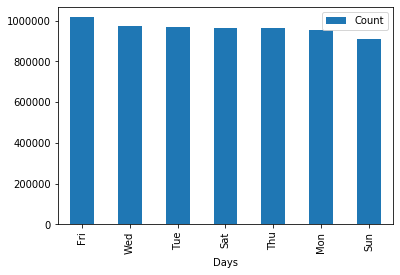

In [48]:
cd.plot(kind='bar',x= "Days", y="Count")